# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://pef.fa.us1.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX/job/4998">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.
- Located in Israel

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to one of the following:
    - roni.goldshmidt@ni.com / miriam.horovicz@ni.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch.optim as optim
import torch.nn as nn
import torch
%matplotlib inline

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,3b2e28,0,12,False,False
1,3b2e28,0,13,True,False
2,3b2e28,0,14,False,False
3,3b2e28,0,15,True,False
4,3b2e28,0,16,True,False


In [4]:
#load test data
df_wafers_test = pd.read_csv(zf.open('df_wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,5a6ad6,0,12,False
1,5a6ad6,0,13,True
2,5a6ad6,0,14,True
3,5a6ad6,0,15,True
4,5a6ad6,0,16,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [6]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

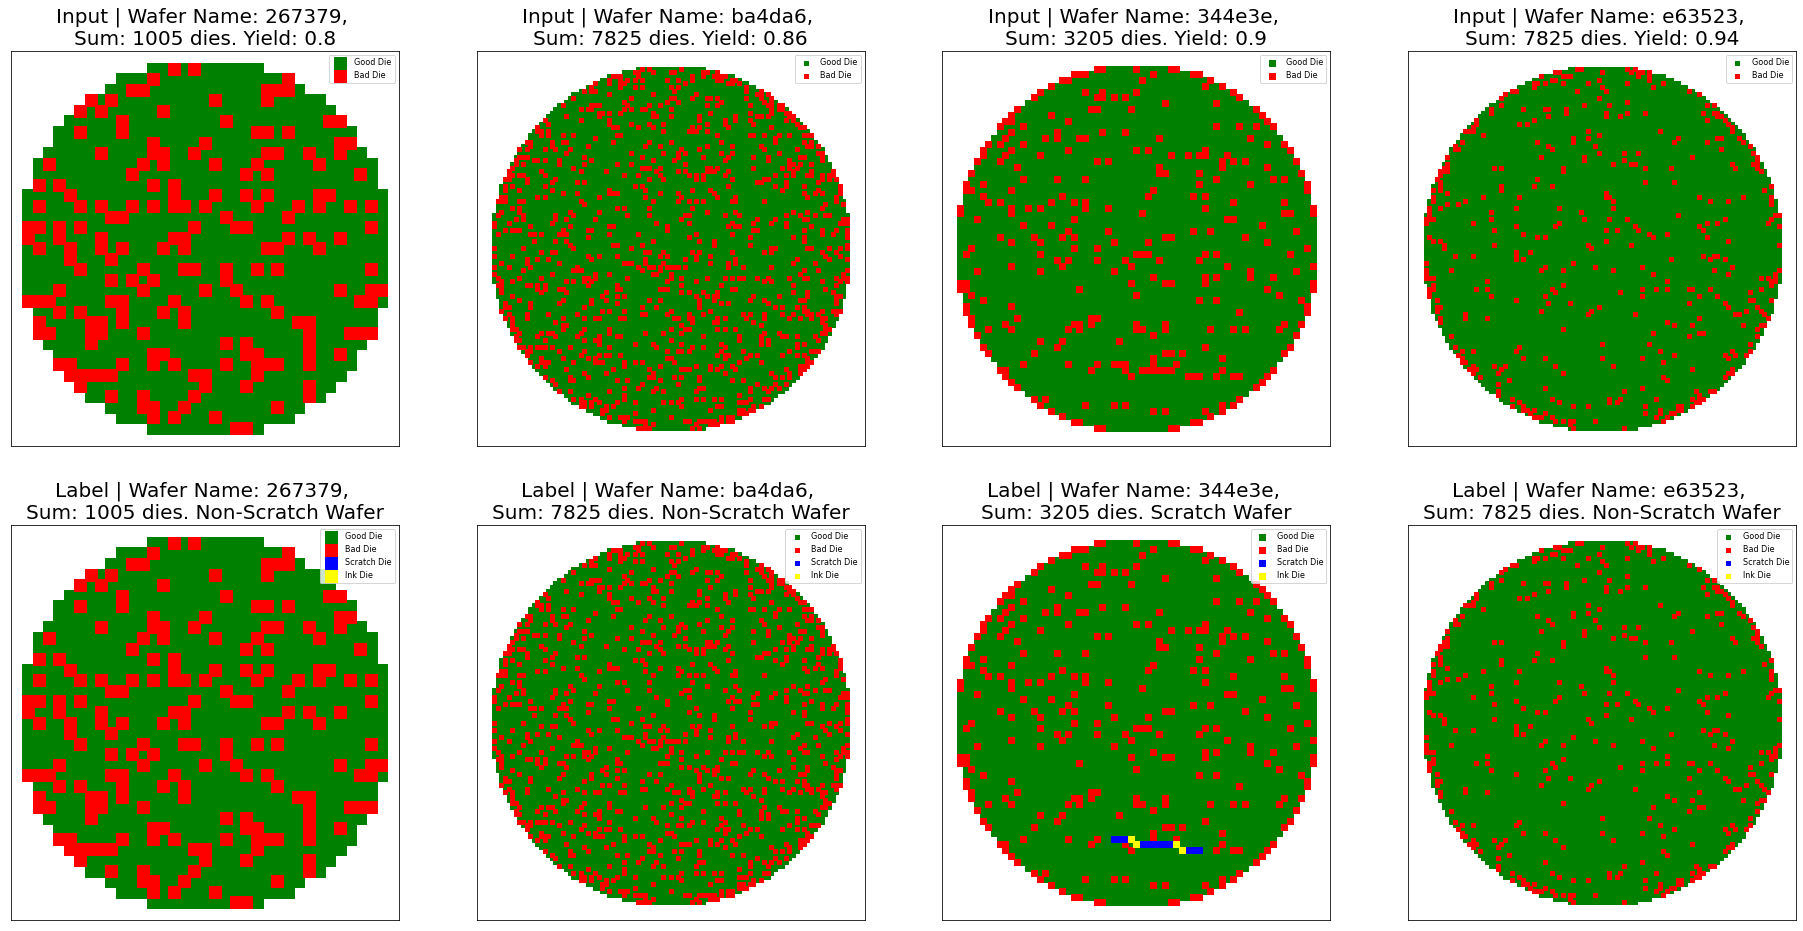

In [7]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

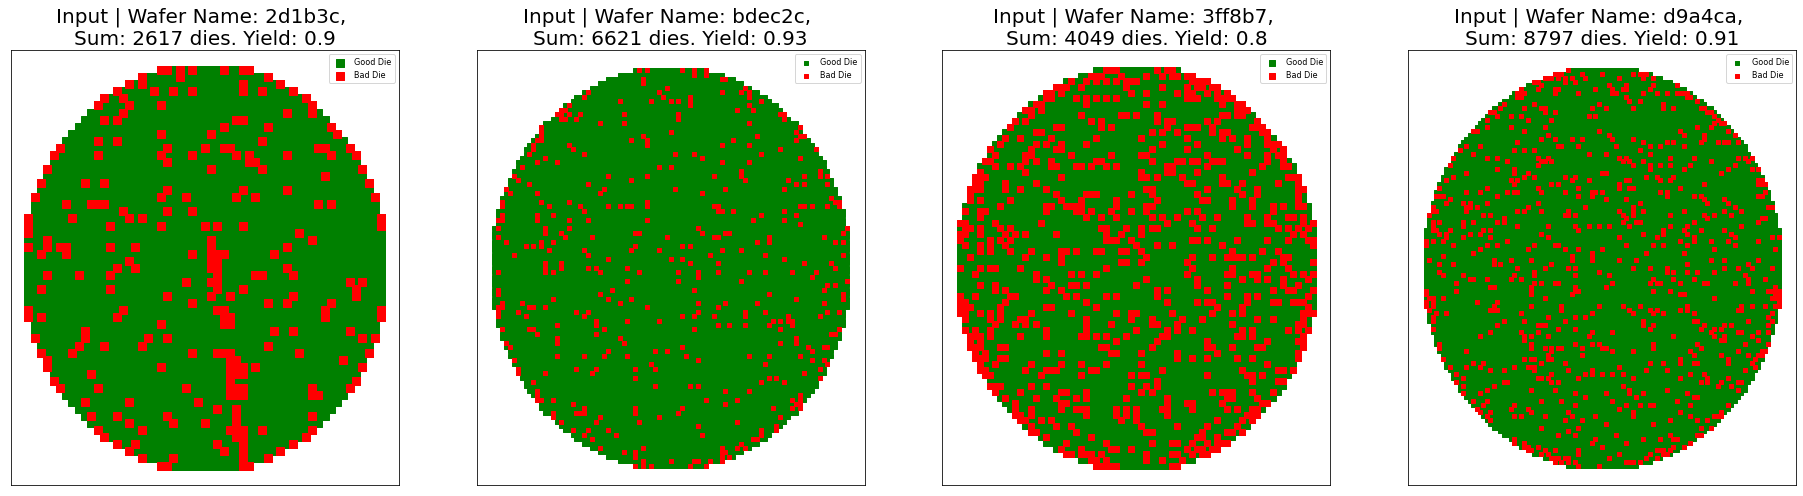

In [8]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

# First Let's Start with data  (EDA)

In [8]:
df_wafers_explor = df_wafers.copy()
# Let's add a column that says if wafer is Ink
df_wafers_explor['InkDie'] = (df_wafers_explor['IsGoodDie'] == True) & (df_wafers_explor['IsScratchDie'] == True)
df_wafers_explor.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie,InkDie
0,3b2e28,0,12,False,False,False
1,3b2e28,0,13,True,False,False
2,3b2e28,0,14,False,False,False
3,3b2e28,0,15,True,False,False
4,3b2e28,0,16,True,False,False


Define criterion, where Yield_Thres is HyperParam.
In the future I going use this parameter to make pre-processing filtering.

In [9]:
YIELD_THRES = 0.86
Yield = list_sample_train[2]['IsGoodDie'].sum()  / list_sample_train[2]['WaferName'].count()

Let's look on data and try got some conclusion

In [10]:
df_wafer_group = df_wafers_explor.groupby(['WaferName']).aggregate(
    {'DieX': 'max',
     'DieY': 'max',
     'WaferName': 'count',
     'IsGoodDie': 'sum',
     'IsScratchDie':'sum',
      'InkDie': 'sum'}).rename(columns={
    'DieX':'max_DieX',
    'WaferName': 'total_dies',
    "DieY": 'max_DieY',
    "IsGoodDie": 'num_good_dies',
    'IsScratchDie': 'num_scratch_dies',
    'InkDie': 'num_inked_dies'})
df_wafer_group["Yield"] = df_wafer_group["num_good_dies"] / df_wafer_group["total_dies"]
df_wafer_group["IsScretce"] = df_wafer_group["num_scratch_dies"] > 0
df_wafer_group

,max_DieX,max_DieY,total_dies,num_good_dies,num_scratch_dies,num_inked_dies,Yield,IsScretce
WaferName,,,,,,,,
001f23,34,34,1005,917,0,0,0.912438,False
002e68,84,84,5785,4535,0,0,0.783924,False
002ff9,98,98,7825,6993,0,0,0.893674,False
003483,20,20,373,305,0,0,0.817694,False
004531,42,42,1513,1133,0,0,0.748843,False
...,...,...,...,...,...,...,...,...
ffa518,70,70,4049,3795,46,12,0.937268,True
ffdb12,76,76,4765,4001,0,0,0.839664,False
ffe0d2,42,42,1513,1378,0,0,0.910773,False


In [11]:
total_dies_group = df_wafer_group.groupby(["total_dies"]).aggregate(
    {'IsScretce': 'mean',
     'num_scratch_dies': 'mean',
     'num_inked_dies': 'mean',
     'Yield': 'mean'}).rename(columns={
    'IsScretce': 'isScratched[Mean]',
    'num_scratch_dies': 'num_scratch_dies[Mean]',
    'num_inked_dies': 'num_inked_dies[Mean]',
    'Yield': 'Yield[Mean]'
})

total_dies_group

,isScratched[Mean],num_scratch_dies[Mean],num_inked_dies[Mean],Yield[Mean]
total_dies,,,,
373,0.000000,0.000000,0.000000,0.826948
1005,0.500000,11.071023,2.477273,0.872507
1513,0.507289,13.113703,2.676385,0.871649
1941,0.479452,14.465753,3.145205,0.880211
2617,0.508721,17.377907,3.715116,0.887729
3205,1.000000,37.011628,8.302326,0.911697
4049,0.517751,20.813609,4.520710,0.894870
4765,0.481894,22.064067,4.690808,0.892255
5785,0.457895,22.428947,5.063158,0.893377


In [12]:
test_explor = df_wafers_test.copy()
df_wafer_test_group = df_wafers_test.groupby(['WaferName']).aggregate(
    {'DieX': 'max',
     'DieY': 'max'}).rename(columns={
     'DieX':'max_DieX',
     'DieY':'max_DieY'})
df_wafer_test_group
print(df_wafer_test_group['max_DieX'].max())
print(df_wafer_group['max_DieX'].max())


104
104


# Conclusion After Data Exploration:
1. max/min Die in the same coordinate and it looks like this parameter affects the number of "dies" in the wafer.
2. We can calculate Yield straightforwardly from the data This going to be our first step in our ALG if the yield is smaller than some Threshold we not going to search for scratch in the wafer.
3.  We see when we get a small wafer with total dies = 373 We don't have scratch and the reason is that yield is very low.
from the other side, we can see when we have total_dies= 3205 we get 100% to detect scratch the main reason look that we have a very high yield bigger than 91%.
But from the business view, I recommend contacting the manufacturer and trying to understand what happens and maybe returning those wafers series.

# Step1:

In [13]:
def calc_yeild(sample, Yield_thres=0.86):
    """

    :param sample:
    :param Yield_thres:
    :return: Yield (precntage number between zero to one)
             flag - bool (True of cpntinue searce scratch False opsite)
    """
    Yield = sample['IsGoodDie'].sum()  / sample['WaferName'].count()
    if Yield < Yield_thres:
        return Yield, False
    return Yield, True

In [14]:
# Check the function
for i in range(len(list_sample_test)):
    Yield_train, flag_train = calc_yeild(list_sample_train[i])
    Yield_test, flag_test = calc_yeild(list_sample_test[i])
    print(f"Yield_train = {Yield_train}  flag_train = {flag_train}")
    print(f"Yield_test = {Yield_test}  flag_test = {flag_test} \n")

Yield_train = 0.9029423003439052  flag_train = True
Yield_test = 0.954803655223512  flag_test = True 

Yield_train = 0.8039800995024876  flag_train = False
Yield_test = 0.9431287813310285  flag_test = True 

Yield_train = 0.8750216076058772  flag_train = True
Yield_test = 0.8983578219533276  flag_test = True 

Yield_train = 0.9036579082946935  flag_train = True
Yield_test = 0.9060702875399361  flag_test = True 



# Change from CSV to image (Run once)

In [36]:
def convert_to_images(data, directory='train_scratch', label=False):
    # Group the data
    groups = data.groupby('WaferName')
    # Iterate over the groups
    for index, (name, group) in enumerate(groups):
        # Convert dataframe to Numpy
        if not label:
            img_data = group[['DieX', 'DieY', 'IsGoodDie']].values
        else:
            img_data = group[['DieX', 'DieY', 'IsScratchDie']].values
        max_x = (group['DieX']).max()
        max_y = (group['DieY']).max()
        # Create an empty image
        image = Image.new(mode="RGB", size=(max_x + 1, max_y + 1))
        # Create a list of tuples containing the coordinates and pixel values
        pixels = [(x, y, value) for x, y, value in img_data]
        # Set the pixel values in the image
        for x, y, value in pixels:
            if value:
                image.putpixel((x, y), (255, 255, 255))
            else:
                image.putpixel((x, y), (0, 0, 0))
        image = image.resize((256, 256))
        # image.save(f"{directory}/{index}.jpg")
        if group['IsScratchDie'].sum() > 0:
            image.save(f"{directory}/with_scratch/{index}.jpg")
        else:
            image.save(f"{directory}/without_scratch/{index}.jpg")


convert_to_images(data=df_wafers, directory='train_Unet_scratch\mask', label=True)


# Step 2: CNN-Classifier pre-processing

In [15]:
class NetClassifier(nn.Module):
    def __init__(self):
        super(NetClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=32 * 64 * 64, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=2)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 64 * 64)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x



In [16]:
net = NetClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net

NetClassifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=131072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)

In [17]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn.functional as F

# Load the images into PyTorch
transform = transforms.Compose([transforms.ToTensor()])
data = ImageFolder('train_scratch', transform=transform)
# Split the data into training and validation sets
train_size = int(0.8 * len(data))
val_size = len(data) - train_size
train_data, val_data = random_split(data, [train_size, val_size])

# Create data loaders for the training and validation sets
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)

train loop:

In [25]:
# Initialize device (for GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# define the number of epochs you want to train for
num_epochs = 5
# define lists to store losses and accuracies
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    # Set network to train mode:
    net.train()
    # initialize variables to store the loss and accuracy
    train_loss = 0.0
    train_correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # send the data and target to the device (CPU or GPU)
        data, target = data.to(device), target.to(device)
        # Zero grad
        optimizer.zero_grad()
        # Foward-prop
        output = net(data)
        # Calc loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        # update the parameters
        optimizer.step()

        # calculate the accuracy
        _, predicted = torch.max(output.data, 1)
        train_correct += (predicted == target).sum().item()

        # add the batch loss to the epoch loss
        train_loss += loss.item()

    # calculate the average loss and accuracy for the epoch
    train_loss /= len(train_loader)
    train_acc = train_correct / len(train_loader.dataset)
    # set the network to evaluation mode
    net.eval()
    # initialize variables to store the loss and accuracy
    val_loss = 0.0
    val_correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            # send the data and target to the device (CPU or GPU)
            data, target = data.to(device), target.to(device)

            # forward pass
            output = net(data)

            # calculate the loss
            loss = criterion(output, target)

            # calculate the accuracy
            _, predicted = torch.max(output.data, 1)
            val_correct += (predicted == target).sum().item()

            # add the batch loss to the epoch loss
            val_loss += loss.item()

    # calculate the average loss and accuracy for the epoch
    val_loss /= len(val_loader)
    val_acc = val_correct / len(val_loader.dataset)
    # print the losses and accuracies for the epoch
    print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))

    # store the losses and accuracies for plotting
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

Epoch [1/5], Train Loss: 0.6510, Train Acc: 0.6700, Val Loss: 0.5399, Val Acc: 0.8559
Epoch [2/5], Train Loss: 0.2959, Train Acc: 0.9133, Val Loss: 0.0979, Val Acc: 0.9821
Epoch [3/5], Train Loss: 0.0465, Train Acc: 0.9923, Val Loss: 0.0187, Val Acc: 1.0000
Epoch [4/5], Train Loss: 0.0117, Train Acc: 1.0000, Val Loss: 0.0080, Val Acc: 1.0000
Epoch [5/5], Train Loss: 0.0060, Train Acc: 1.0000, Val Loss: 0.0054, Val Acc: 1.0000


# Plot results

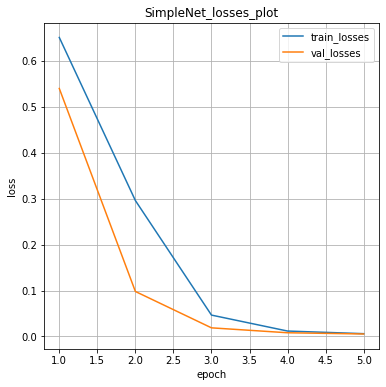

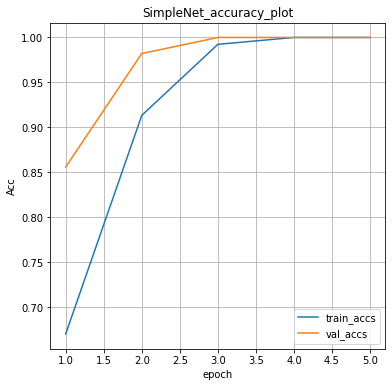

In [26]:
epoch_list = [i for i in range(1, num_epochs+1)]
plt.figure(1, figsize=(6,6))
plt.plot(epoch_list, train_losses, label='train_losses'), plt.plot(epoch_list, val_losses, label='val_losses'), plt.legend()
plt.xlabel('epoch'), plt.ylabel('loss'), plt.grid(True), plt.title("SimpleNet_losses_plot")
plt.show()

plt.figure(2, figsize=(6,6))
plt.plot(epoch_list, train_accs, label='train_accs'), plt.plot(epoch_list, val_accs, label='val_accs'), plt.legend()
plt.xlabel('epoch'), plt.ylabel('Acc'), plt.grid(True), plt.title("SimpleNet_accuracy_plot")
plt.show()

In [27]:
# Save Network results
PATH = './Simple_Net.pth'
torch.save(net.state_dict(), PATH)

In [18]:
# Load Weights
PATH = './Simple_Net.pth'
net = NetClassifier()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

# Test the results of SimpleNet-Step2

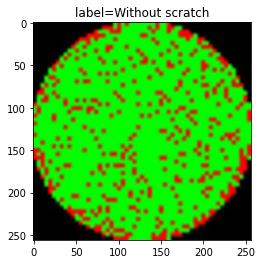

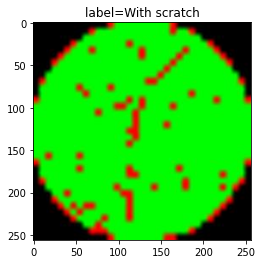

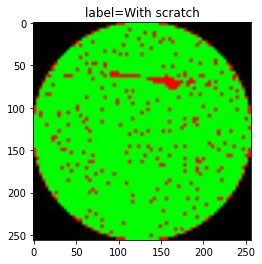

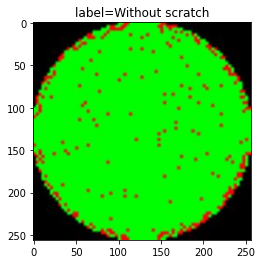

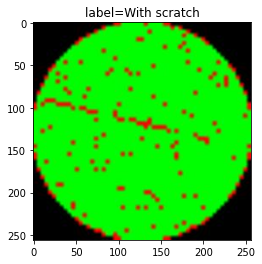

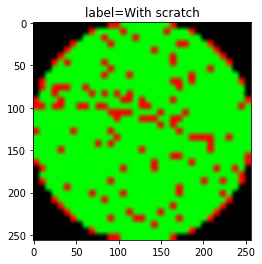

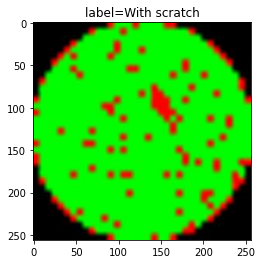

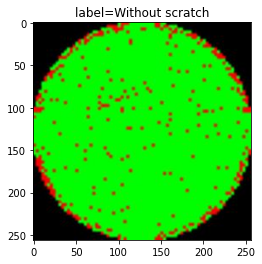

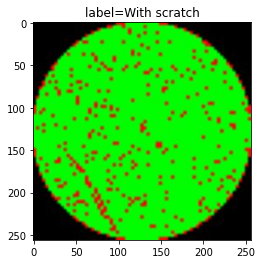

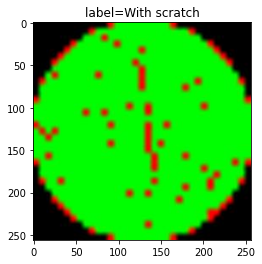

In [33]:
import os
# Load the test set images from the folder
test_dir = 'test_scratch'
test_images = os.listdir(test_dir)
test_list = np.random.randint(len(test_images), size=10)

# Evaluate the model on the test set images
net.eval()

transform = transforms.Compose([transforms.ToTensor()])
for i in range(10):
    image_path = os.path.join(test_dir, test_images[i])
    image = Image.open(image_path)
    image_tensor = transform(image)
    output = net(image_tensor)
    _, predicted = torch.max(output.data, 1)
    if predicted.item() == 0:
        plt.imshow(image), plt.title(f"label=With scratch"), plt.show()
    else:
        plt.imshow(image), plt.title(f"label=Without scratch"), plt.show()

# Step 3

# First Let's make Data augmentation

In [10]:
import glob
import cv2
# Load your images and labels
folder_data = glob.glob("train_Unet_scratch\images\*.jpg")
folder_mask = glob.glob("train_Unet_scratch\mask\*.jpg")
# for i in range(len(folder_data)):
#     print(folder_data[i][:-4])
for i in range(len(folder_data)):
    img = cv2.imread(folder_data[i])
    mask = cv2.imread(folder_mask[i])
    img_rotat = cv2.rotate(img, cv2.ROTATE_180)
    mask_rotat = cv2.rotate(mask, cv2.ROTATE_180)
    cv2.imwrite(f"{folder_data[i][:-4]}_rotate.jpg", img_rotat)
    cv2.imwrite(f"{folder_mask[i][:-4]}_rotate.jpg", mask_rotat)

In [3]:
img = cv2.imread(folder_data[5])
mask = cv2.imread(folder_mask[5])
img_rotat = cv2.rotate(img, cv2.ROTATE_180)
mask_rotat = cv2.rotate(mask, cv2.ROTATE_180)
i = 0
cv2.imwrite(f"train_Unet_scratch\images\{i}_rotate.jpg", img_rotat)
cv2.imwrite(f"train_Unet_scratch\mask\{i}_rotate.jpg", mask_rotat)

True

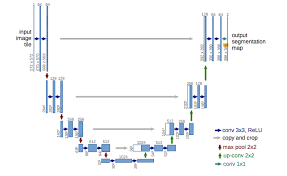

U-Net Architecture
Contracting path (Encoder containing downsampling steps):

Images are first fed through several convolutional layers which reduce height and width, while growing the number of channels.

The contracting path follows a regular CNN architecture, with convolutional layers, their activations, and pooling layers to downsample the image and extract its features. In detail, it consists of the repeated application of two 3 x 3 unpadded convolutions, each followed by a rectified linear unit (ReLU) and a 2 x 2 max pooling operation with stride 2 for downsampling. At each downsampling step, the number of feature channels is doubled.

Crop function: This step crops the image from the contracting path and concatenates it to the current image on the expanding path to create a skip connection.

Expanding path (Decoder containing upsampling steps):

The expanding path performs the opposite operation of the contracting path, growing the image back to its original size, while shrinking the channels gradually.

In detail, each step in the expanding path upsamples the feature map, followed by a 2 x 2 convolution (the transposed convolution). This transposed convolution halves the number of feature channels, while growing the height and width of the image.

Next is a concatenation with the correspondingly cropped feature map from the contracting path, and two 3 x 3 convolutions, each followed by a ReLU. You need to perform cropping to handle the loss of border pixels in every convolution.

Final Feature Mapping Block: In the final layer, a 1x1 convolution is used to map each 64-component feature vector to the desired number of classes. The channel dimensions from the previous layer correspond to the number of filters used, so when you use 1x1 convolutions, you can transform that dimension by choosing an appropriate number of 1x1 filters. When this idea is applied to the last layer, you can reduce the channel dimensions to have one layer per class.

The U-Net network has 23 convolutional layers in total.

In [19]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.in_channel = 3
        self.out_channel = 1

        # Define the encoder path
        self.conv1 = nn.Conv2d(in_channels=self.in_channel, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(512, 1024, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(1024)
        self.pool = nn.MaxPool2d(2)

        # Define the decoder path
        self.upconv6 = nn.ConvTranspose2d(1024, 512, 2, stride=2)
        self.conv7 = nn.Conv2d(1024, 512, 3, padding=1)
        self.bn7 = nn.BatchNorm2d(512)
        self.upconv8 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv9 = nn.Conv2d(512, 256, 3, padding=1)
        self.bn9 = nn.BatchNorm2d(256)
        self.upconv10 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv11 = nn.Conv2d(256, 128, 3, padding=1)
        self.bn11 = nn.BatchNorm2d(128)
        self.upconv12 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv13 = nn.Conv2d(128, 64, 3, padding=1)
        self.bn13 = nn.BatchNorm2d(64)
        self.conv14 = nn.Conv2d(64, self.out_channel, 1)

    def forward(self, x):
        # Encoder path
        x1 = F.relu(self.bn1(self.conv1(x)))
        x2 = F.relu(self.bn2(self.conv2(self.pool(x1))))
        x3 = F.relu(self.bn3(self.conv3(self.pool(x2))))
        x4 = F.relu(self.bn4(self.conv4(self.pool(x3))))
        x5 = F.relu(self.bn5(self.conv5(self.pool(x4))))

        # Decoder path
        x6 = self.upconv6(x5)
        x6 = torch.cat([x6, x4], dim=1)
        x7 = F.relu(self.bn7(self.conv7(x6)))
        x8 = self.upconv8(x7)
        x8 = torch.cat([x8, x3], dim=1)
        x9 = F.relu(self.bn9(self.conv9(x8)))
        x10 = self.upconv10(x9)
        x10 = torch.cat([x10, x2], dim=1)
        x11 = F.relu(self.bn11(self.conv11(x10)))
        x12 = self.upconv12(x11)
        x12 = torch.cat([x12, x1], dim=1)
        x13 = F.relu(self.bn13(self.conv13(x12)))
        x14 = self.conv14(x13)

        # sigmoid function because binary classification
        x14 = torch.sigmoid(x14)

        return x14

In [20]:
# Initialize device (for GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define the U-Net model
model_unet = UNet()
model_unet.to(device)
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_unet.parameters(), lr=0.001)
model_unet

UNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upconv6): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=

# customized data set for semantic segmentation

In [21]:
from torch.utils.data import Dataset
import glob
from sklearn.model_selection import train_test_split
from PIL import Image
from torchvision.transforms import transforms

class CustomDataset(Dataset):
    def __init__(self, image_path, mask_path):   # initial logic happens like transform
        self.image_path = image_path
        self.mask_path = mask_path
        self.transform = transforms.Compose([transforms.ToTensor()])
        self.im_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                                                           std=[0.5, 0.5, 0.5])])

    def __getitem__(self, index):
        image = Image.open(self.image_path[index])
        mask = Image.open(self.mask_path[index])
        mask = mask.convert('1')
        tensor_image = self.im_transform(image)
        tensor_mask = self.transform(mask)
        return tensor_image, tensor_mask

    def __len__(self):  # return count of sample we have
        return len(self.image_path)


def iou_score(outputs, labels):
    # Compute the intersection over union
    outputs = outputs > 0.5
    labels = labels > 0.5
    intersection = (outputs & labels).float().sum((1, 2))
    union = (outputs | labels).float().sum((1, 2))
    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou.mean()


# Load your images and labels
folder_data = glob.glob("train_Unet_scratch\images\*.jpg")
folder_mask = glob.glob("train_Unet_scratch\mask\*.jpg")

custom_img = CustomDataset(folder_data, folder_mask)
# Split the data into training and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(folder_data, folder_mask, test_size=0.2)
# Create datasets
train_dataset = CustomDataset(train_images, train_masks)
val_dataset = CustomDataset(val_images, val_masks)
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=True)

Train loop:

In [3]:
# Train the model
num_epochs = 10

# Define some variables to keep track of your training progress
train_loss_list = []
val_loss_list = []
train_iou_list = []
val_iou_list = []

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    train_iou = 0.0
    val_iou = 0.0

    # Train the model
    model_unet.train()
    for i, (inputs, masks) in enumerate(train_loader):
        inputs = inputs.to(device)
        masks = masks.to(device)
        optimizer.zero_grad()
        outputs = model_unet(inputs)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_iou += iou_score(outputs, masks).item()

    # Evaluate the model on the validation set
    model_unet.eval()
    with torch.no_grad():
        for inputs, masks in val_loader:
            inputs = inputs.to(device)
            masks = masks.to(device)
            outputs = model_unet(inputs)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
            val_iou += iou_score(outputs, masks).item()

    # Calculate the average loss and IoU for this epoch
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    train_iou /= len(train_loader)
    val_iou /= len(val_loader)

    # Print the results for this epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train IoU: {train_iou:.4f}, Val IoU: {val_iou:.4f}")

    # Add the results to the lists for plotting
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_iou_list.append(train_iou)
    val_iou_list.append(val_iou)

Epoch 1/10, Train Loss: 0.1235, Val Loss: 0.0328, Train IoU: 0.7831, Val IoU: 0.8261
Epoch 2/10, Train Loss: 0.0169, Val Loss: 0.0126, Train IoU: 0.8727, Val IoU: 0.8841
Epoch 3/10, Train Loss: 0.0104, Val Loss: 0.0104, Train IoU: 0.8997, Val IoU: 0.9037
Epoch 4/10, Train Loss: 0.0084, Val Loss: 0.0081, Train IoU: 0.9103, Val IoU: 0.9153
Epoch 5/10, Train Loss: 0.0075, Val Loss: 0.0094, Train IoU: 0.9165, Val IoU: 0.9037
Epoch 6/10, Train Loss: 0.0068, Val Loss: 0.0071, Train IoU: 0.9223, Val IoU: 0.9250
Epoch 7/10, Train Loss: 0.0062, Val Loss: 0.0078, Train IoU: 0.9271, Val IoU: 0.9078
Epoch 8/10, Train Loss: 0.0058, Val Loss: 0.0067, Train IoU: 0.9311, Val IoU: 0.9269
Epoch 9/10, Train Loss: 0.0052, Val Loss: 0.0075, Train IoU: 0.9357, Val IoU: 0.9129
Epoch 10/10, Train Loss: 0.0049, Val Loss: 0.0063, Train IoU: 0.9389, Val IoU: 0.9313



# Plot results

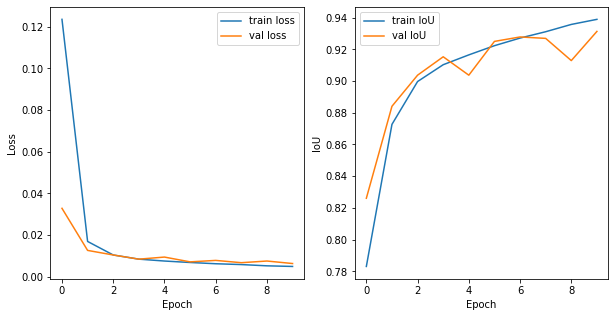

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label="train loss")
plt.plot(val_loss_list, label="val loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(train_iou_list, label="train IoU")
plt.plot(val_iou_list, label="val IoU")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("IoU")
plt.show()

In [ ]:
# Save Network results
PATH = './U_Net.pth'
torch.save(model_unet.state_dict(), PATH)

In [22]:
# Load Unet weights
PATH = './U_Net.pth'
model_unet = UNet()
model_unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

# Test results and add post-processing (Morphological)

First let's sample from train set

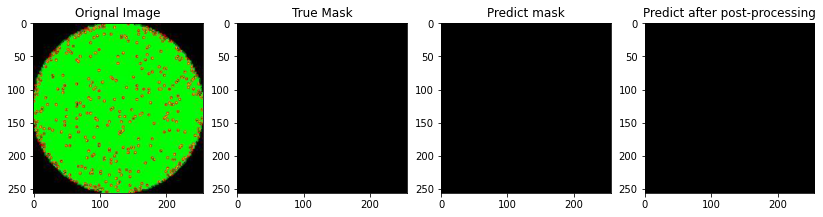

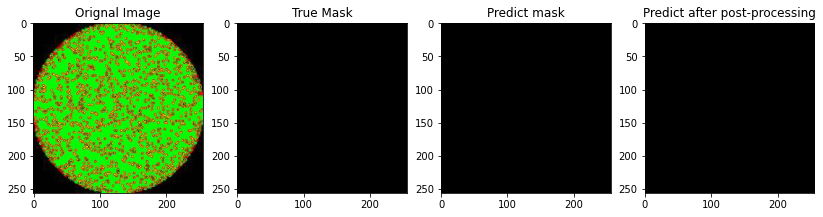

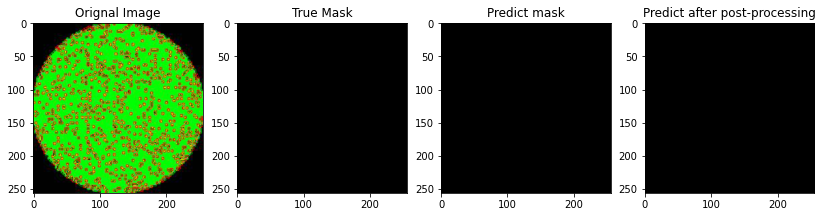

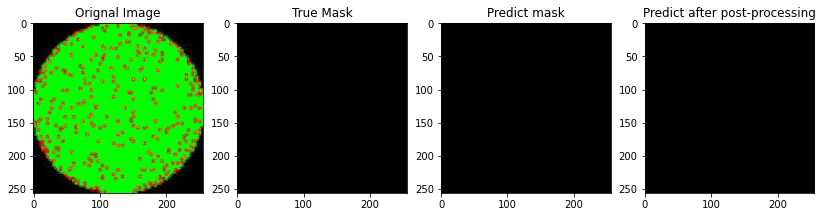

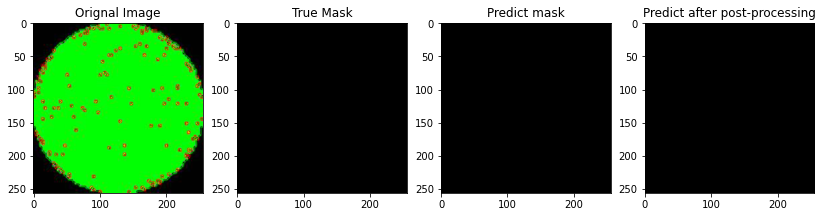

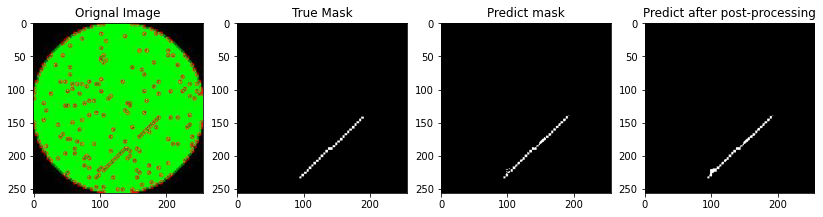

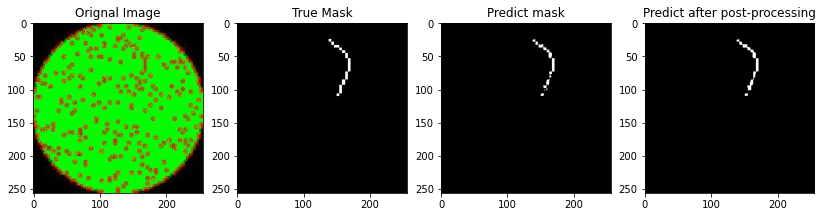

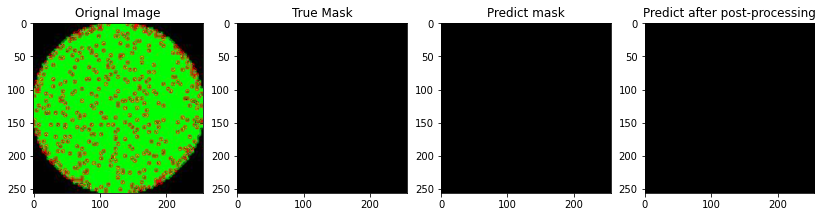

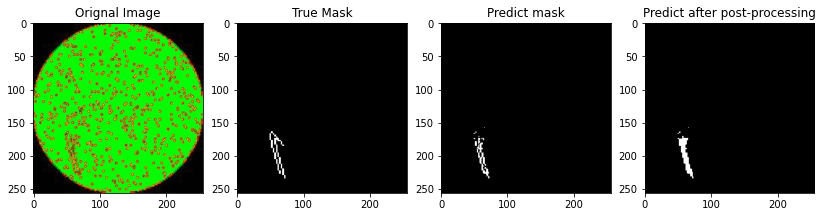

In [15]:
# Load your images and labels
model_unet.eval()

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
from torch.utils.data import DataLoader
import torchvision.transforms as transforms


# Load your images and labels
folder_data = glob.glob("train_Unet_scratch\images\*.jpg")
folder_mask = glob.glob("train_Unet_scratch\mask\*.jpg")

custom_img = CustomDataset(folder_data, folder_mask)
# Split the data into training and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(folder_data, folder_mask, test_size=0.2)
# Create datasets
train_dataset = CustomDataset(train_images, train_masks)
val_dataset = CustomDataset(val_images, val_masks)
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
model_unet.eval()

import torchvision.transforms.functional as TF
kernel = np.ones((5, 5), np.uint8)
for i, (inputs, masks) in enumerate(train_loader):
    inputs = inputs.to(device)
    output = model_unet(inputs)
    output = output.cpu().detach().numpy()
    output = output > 0.5
    output = output.squeeze()
    dil_input = output.astype(np.uint8)
    output_dilation = cv2.morphologyEx(dil_input, cv2.MORPH_CLOSE, kernel)
    inputs = TF.to_pil_image(inputs.cpu().detach().squeeze())
    masks = masks.cpu().detach().numpy()
    plt.figure(figsize=(14, 14))
    plt.subplot(1, 4, 1)
    plt.imshow(inputs), plt.title("Orignal Image")
    plt.subplot(1, 4, 2)
    plt.imshow(masks.squeeze(), cmap='gray'), plt.title("True Mask")
    plt.subplot(1, 4, 3)
    plt.imshow(output, cmap='gray'), plt.title("Predict mask")
    plt.subplot(1, 4, 4)
    plt.imshow(output_dilation, cmap='gray'), plt.title("Predict after post-processing")
    plt.show()
    if i == 8:
        break

Now let's sample from test set

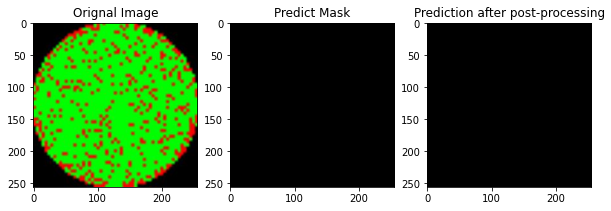

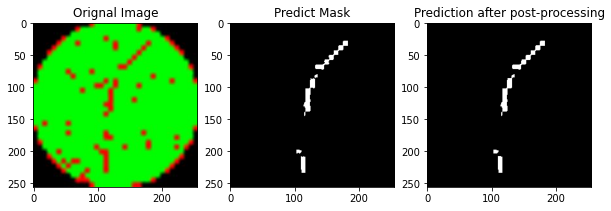

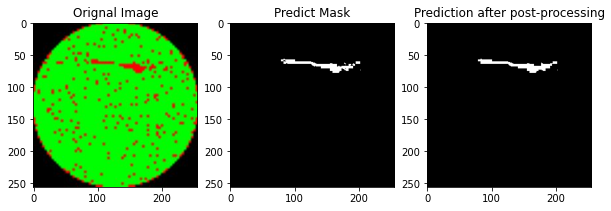

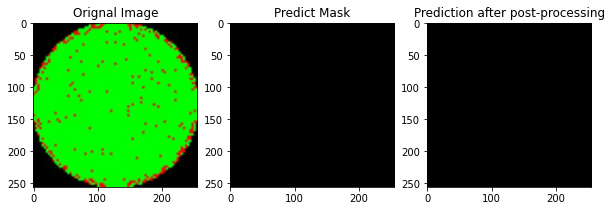

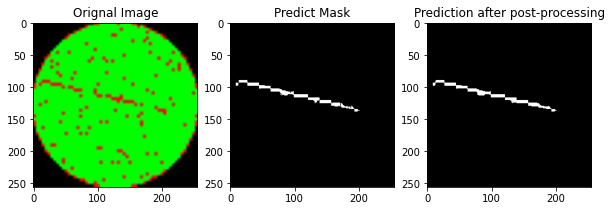

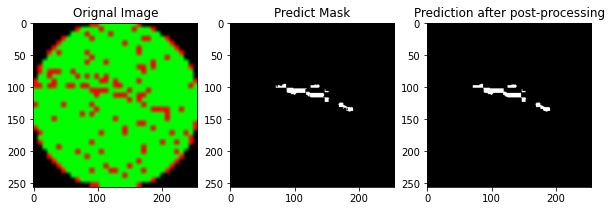

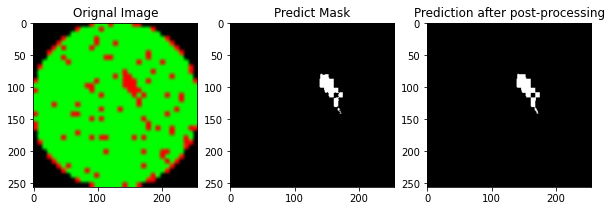

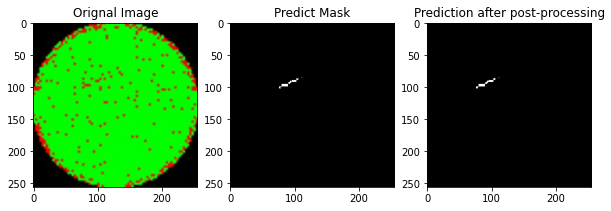

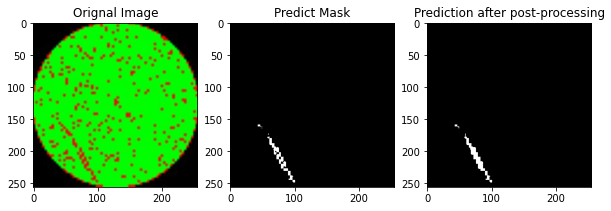

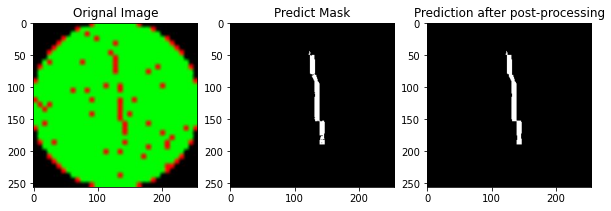

In [40]:
test_dir = 'test_scratch'
test_images = os.listdir(test_dir)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                                                           std=[0.5, 0.5, 0.5])])

kernel = np.ones((5, 5), np.uint8)

for i in range(10):
    image_path = os.path.join(test_dir, test_images[i])
    image = Image.open(image_path)
    image_tensor = transform(image)
    image_tensor = image_tensor.unsqueeze(0)
    output = model_unet(image_tensor)
    output = output > 0.5
    output = output.squeeze().numpy()
    dil_input = output.astype(np.uint8)
    output_dilation = cv2.morphologyEx(dil_input, cv2.MORPH_CLOSE, kernel)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(image), plt.title("Orignal Image")
    plt.subplot(1, 3, 2)
    plt.imshow(output, cmap='gray'), plt.title("Predict Mask")
    plt.subplot(1, 3, 3)
    plt.imshow(output_dilation, cmap='gray'), plt.title("Prediction after post-processing")
    plt.show()

# Convert From Image result back to csv and Predict results

In [9]:
def convert_to_csv(data, directory='train_scratch'):
    # Evaluate the model on the test set images
    net.eval()
    model_unet.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    # Group the data
    groups = data.groupby('WaferName')

    # Create an empty list to store the output data
    output_data = []

    # Iterate over the groups
    for index, (name, group) in enumerate(groups):
        # Convert dataframe to Numpy
        img_data = group[['DieX', 'DieY', 'IsGoodDie']].values
        max_x = (group['DieX']).max()
        max_y = (group['DieY']).max()
        # Step1:
        _, yield_flag = calc_yeild(group)
        if yield_flag:
            # Step2:
            # read image
            image = Image.open(f'{directory}\{index}.jpg')
            image_tensor = transform(image)
            image_tensor = image_tensor.to(device)
            output = net(image_tensor)
            _, predicted = torch.max(output.data, 1)
            if predicted.item() == 0:
                # Step3 Unet Model
                transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                                                                            std=[0.5, 0.5, 0.5])])
                image_tensor = transform(image)
                image_tensor = image_tensor.unsqueeze(0)
                image_tensor = image_tensor.to(device)
                output = model_unet(image_tensor)
                output = output > 0.5
                output_cpu = output.to("cpu")
                output = output_cpu.squeeze().numpy()
                output = Image.fromarray(output)
                output = output.resize((max_x + 1, max_y + 1))
                output = output.convert('1')
                # dil_input = output.astype(np.uint8)
                # # Make post-processing morphology
                # output_dilation = cv2.morphologyEx(dil_input, cv2.MORPH_CLOSE, kernel)
                # output_dilation = Image.fromarray(output_dilation)
                # output_dilation = output_dilation.resize((max_x + 1, max_y + 1))
                # output_dilation = output_dilation.convert('1')
                is_scratch_die_list = []
                for x, y, isGoodDie in img_data:
                    is_scratch_die = False
                    if output.getpixel((x, y)) > 0.5:
                        is_scratch_die = True
                    is_scratch_die_list.append(is_scratch_die)
                group['IsScratchDie'] = is_scratch_die_list
            else:
                # There is No scratch in the wafer
                group['IsScratchDie'] = len(group) * [False]
        else:
            # Step1:
            group['IsScratchDie'] = len(group) * [False]

        output_data.append(group)
    # Make data to single dataFrame
    output_df = pd.concat(output_data)
    # Write the output dataframe to a CSV file
    # output_df.loc[data.index].to_csv(f'{directory}/output.csv', index=False)
    return output_df.loc[data.index]

In [10]:
df_check = df_wafers.copy()
df_check.drop('IsScratchDie',
  axis='columns', inplace=True)

df_train_pred = convert_to_csv(df_check, 'train_Unet_scratch')
directory = 'train_Unet_scratch'
df_train_pred.to_csv(f'{directory}/df_wafers_train_with_pred.csv', index=False)

print("Save df_wafers_train_with_pred.csv")

df_test_pred = convert_to_csv(df_wafers_test, 'test_scratch')
df_test_pred.to_csv(f'{directory}/df_wafers_test_with_pred.csv', index=False)

print("Save df_wafers_tese_with_pred.csv")

Save df_wafers_train_with_pred.csv
Save df_wafers_tese_with_pred.csv


# Check Final results + Submission

In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import zipfile
#load zip file
zf = zipfile.ZipFile('data.zip')
#load train data
df_wafers = pd.read_csv(zf.open('df_wafers.csv'))
df_wafer_train_predict = pd.read_csv('df_wafers_train_with_pred.csv')
df_wafer_test_predict = pd.read_csv('df_wafers_test_with_pred.csv')

label = df_wafers['IsScratchDie']
pred = df_wafer_train_predict['IsScratchDie']

# Calc F1_score precision and recall
tn, fp, fn, tp = confusion_matrix(label, pred).ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
F1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print(f"Recall = {recall}")
print(f"Precision = {precision}")
print(f"F1_score = {F1_score}")

Recall = 0.8211387276629792
Precision = 0.8505762248066094
F1_score = 0.835598291426762


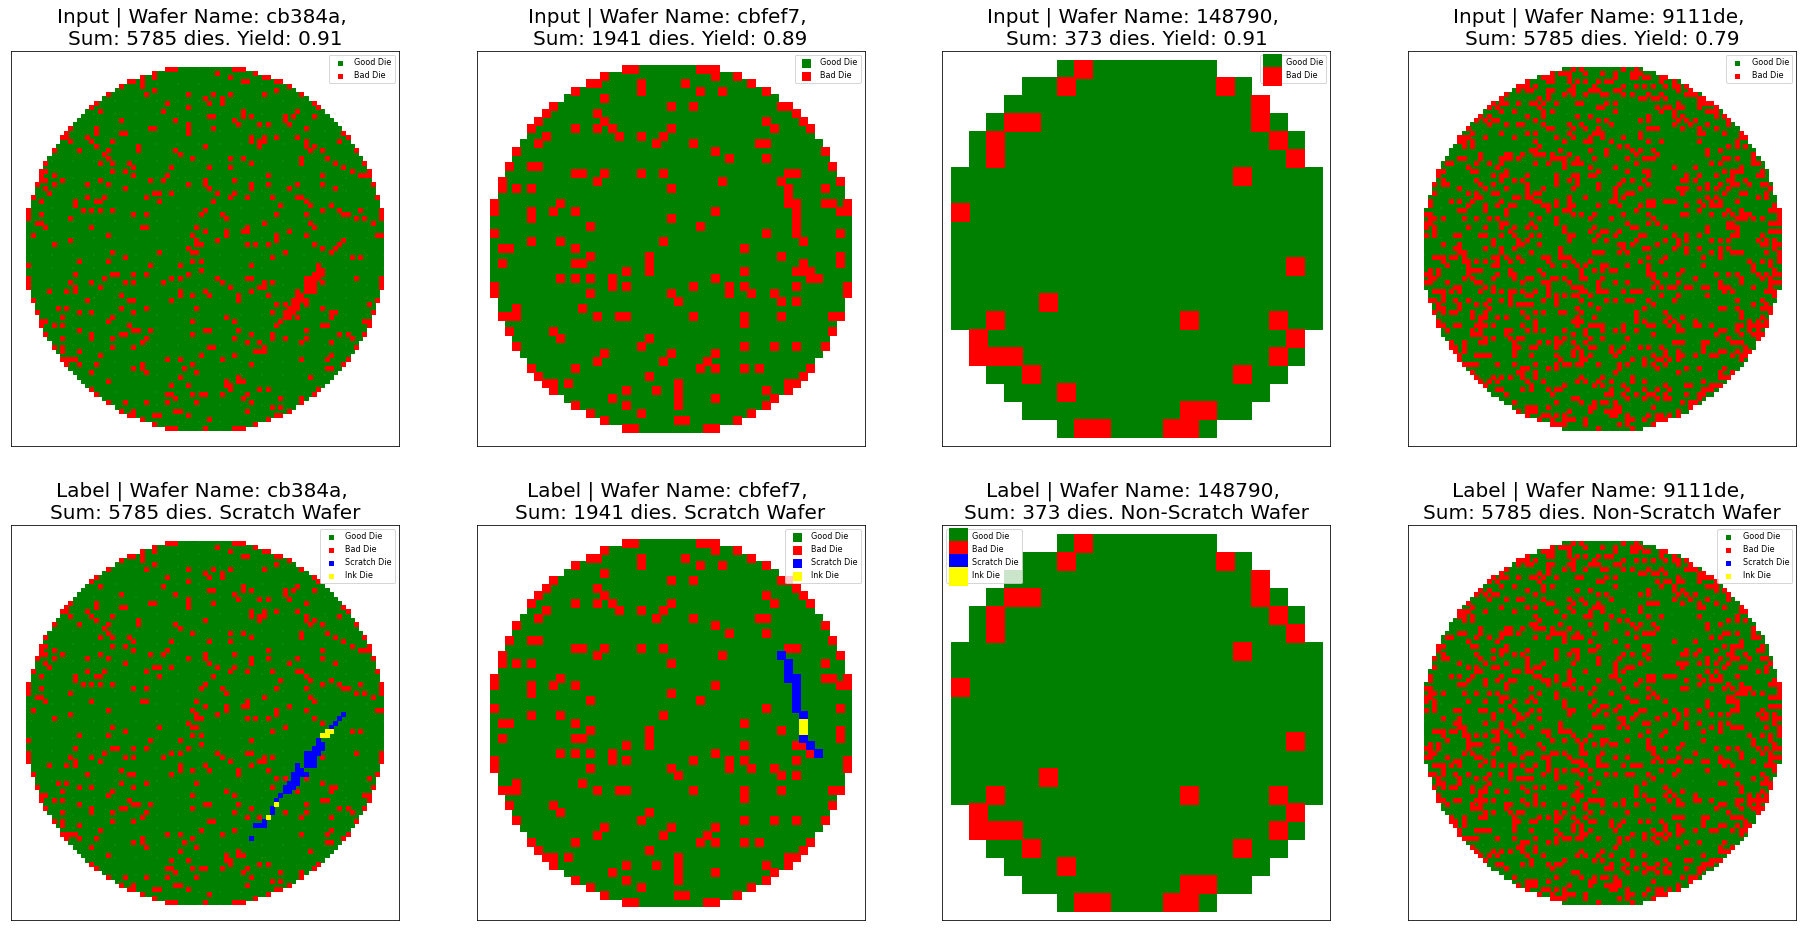

In [13]:
n_samples = 4
list_sample_train = [df_wafer_train_predict.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

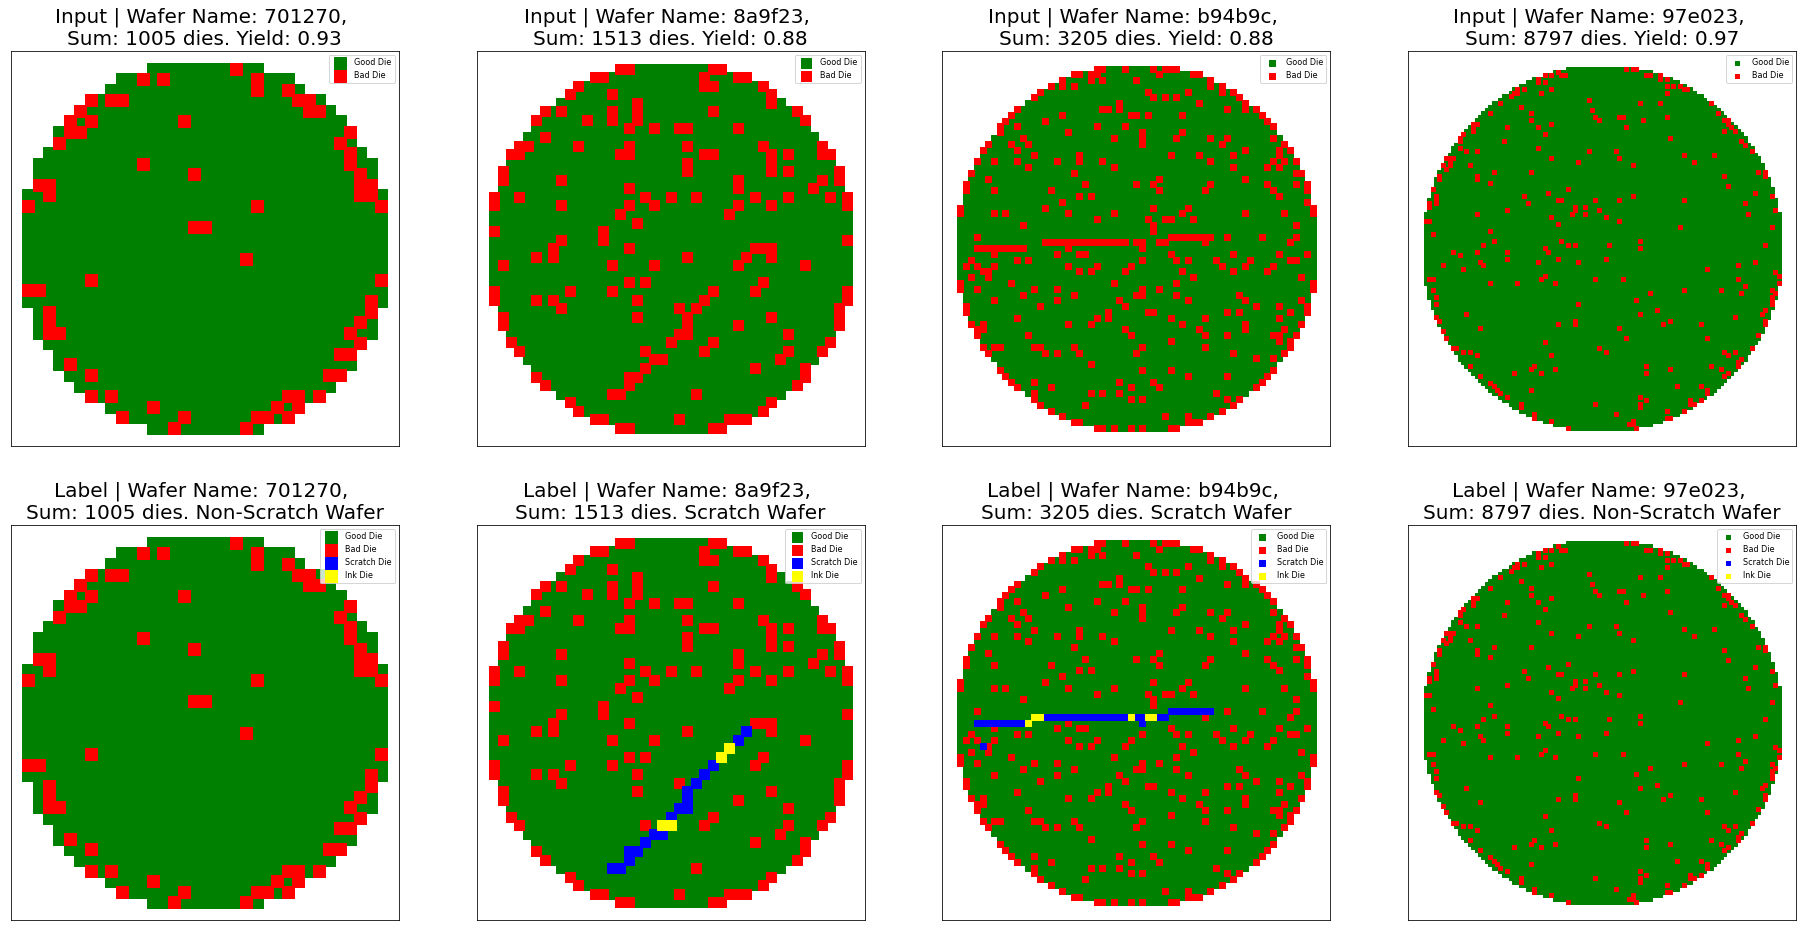

In [19]:
n_samples = 4
list_sample_test = [df_wafer_test_predict.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = True)

# Additional thoughts

To Solve the problem I split my Algorithm into 3 main steps, the first two steps are pre-processing so after that the solution is more accurate and accepts the business perspective.
If we consider the business perspective we want that wafers with low yields not perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink.
In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will **not** consider a sequence of bad die to be scratch.
In Addition, we going to find out if is there a scratch on a wafer or not, before the final step which is to classify whether "dies" belongs to a scratch or not.

Summarize The ALG:

**Step1:** Calculate Yield.
$ Yield = {Good\;Dies\;in\;wafer}\;\;/\;\;{Total\;dies\;in\;wafer} $

If $Yield < T$ then:
not perform scratch detection when T = YIELD_THRES, is Hyper parameter I choose 0.86.

**Step2:** Find scratch.
Train Simple CNN Classifier that predict given wafer map if there is scratch or not.

Explanation to step2:
We train a simple CNN classifier the reason that I choose CNN is that the problem of classifying scratch is an invariant shift problem, in addition, scratch patterns in images obey the Markov assumption so choosing simple CNN is the right thing to do and we see very good results.
I split the data_train to 80%-train and 20% valid, the metric that I use to measure successes of the network is acc (I plot the results).

**Step3:**: Train U-net architecture Network that classify whether "dies" belongs to a scratch.
I choose U-net because I decided to look on the problem of classify die as semantic segmentation problem A common problem in computer vision.

Explanation step3:
Before I train the network I make image augmentation to improve the network results In addition after the prediction of the network I use post-processing to improve the results.
I choose the metric Iou - Intersection over Union because this is the right metric to choose in semantic segmentation we have the problem of imbalance class so choose for example pixel accuracy is not the right metric.
We see not bad results I got Iou_valid around 93%




finally I check the results on train, I use F1 score because we handle with skewed data set.
F1_score =0.835

Problems and improvements:
I think that my main problem is when I convert the CSV data to the image I make a lot of operations like resizing etc, so I add artifacts(aliasing for example) and noise to the data and it reduces the accuracy of the prediction, I need to think how I can do better.

# Submission

In [ ]:
#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie
df_wafers_test.to_csv('df_wafers_test_with_preds.csv')